# STAMP Case Study - Juan Bautista Beyhaut Notebook

The following Notebook illustrates a guided exploratory analysis of STAMP's transactions data (December) accompanied with recurrent interpretation comments and a final recommendation on a possible retention strategy to boost retention and engagement for STAMP. 

**NOTE FOR READERS**: IF you are reading this notebook in any Jupyter Notebok server/interface, ensure to run code snippets in a top-to-buttom order as the code builds sequentially on previous outputs. Running cells out of order may cause execution errors.

### **Quick Dataset View: Exploratory Data Analysis**

In [50]:
import pandas as pd

# Load dataset (xslx)
data_path = "CaseStudyInvoices.xlsx"
data_excel = pd.ExcelFile(data_path)

df = data_excel.parse(data_excel.sheet_names[0])

In [52]:
# overview of dataset
num_rows, num_columns = df.shape
column_data_types = df.dtypes

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
print("")
print(f"Data types: {column_data_types}")

print("")

print("First few rows:")
print(df.head())
print("")
print("Last Few Rows:")
print(df.tail())

Number of rows: 5000
Number of columns: 6

Data types: MerchantId                                  object
InvoiceId                                   object
CustomerId                                  object
CustomerResidencyCountryIso2Code            object
TotalPriceWithVat                          float64
IssuedOn                            datetime64[ns]
dtype: object

First few rows:
                             MerchantId                             InvoiceId  \
0  641F77C8-9ACB-4F8E-8D7F-ACBB78B838A2  AB0E60CB-2DFC-2E55-F0D2-0007CE483480   
1  14357C7F-8F1A-4B38-8C13-B721CB4E2E01  6B5BFE58-6EE0-6F5C-6F76-0015117D2435   
2  1F7659A8-59BD-4DFC-A8C7-A8DD867BCCC2  70D7A7C4-9B46-DE3F-BEA3-0024F7401D90   
3  0DB16491-6E65-48F6-B3C1-3A8910F2CC4E  6C5602A9-F1ED-FB68-218C-002B89B75E17   
4  0D611F28-2420-4C8D-99C7-EC8CA345D844  3A4AC117-D278-2F8D-FEF9-0031D34EB5BB   

                             CustomerId CustomerResidencyCountryIso2Code  \
0  0F33216F-370F-40ED-8D14-F28B48BA1208      

In [53]:
# data quality check
print("Missing values:")
print(df.isnull().sum())
print("")
print("Duplicated rows:")
print(df.duplicated().sum())

Missing values:
MerchantId                          0
InvoiceId                           0
CustomerId                          0
CustomerResidencyCountryIso2Code    0
TotalPriceWithVat                   0
IssuedOn                            0
dtype: int64

Duplicated rows:
0


In [54]:
# verifying uniqueness of identifiers
unique_invoice_ids = df['InvoiceId'].nunique()
is_invoice_id_unique = unique_invoice_ids == len(df)
print(f"Is 'InvoiceId' truly unique? {is_invoice_id_unique}")

unique_customer_ids = df['CustomerId'].nunique()
print(f"Number of unique 'CustomerId': {unique_customer_ids}")

Is 'InvoiceId' truly unique? True
Number of unique 'CustomerId': 3780


In [ ]:
# summary stats
# numerical:
print(df.describe())
print("")

# categorical:
print(df.describe(include=['object']))
print("")

# datetime:
datetime_summary = {
    "Earliest date": df["IssuedOn"].min(),
    "Latest date": df["IssuedOn"].max(),
    "Number of unique dates": df["IssuedOn"].dt.date.nunique(),
    "Most frequent date": df["IssuedOn"].dt.date.mode()[0]
}
print("'IssuedOn' quick summary:")
for key, value in datetime_summary.items():
    print(f"{key}: {value}")

       TotalPriceWithVat
count        5000.000000
mean          630.414142
std          2129.743326
min            69.960000
25%           135.902500
50%           220.000000
75%           400.000000
max         52000.000000

                                  MerchantId  \
count                                   5000   
unique                                   331   
top     EFDED790-9BED-4A18-887B-1A3DA577AA20   
freq                                     393   

                                   InvoiceId  \
count                                   5000   
unique                                  5000   
top     AB0E60CB-2DFC-2E55-F0D2-0007CE483480   
freq                                       1   

                                  CustomerId CustomerResidencyCountryIso2Code  
count                                   5000                             5000  
unique                                  3780                               54  
top     B1F7D4D4-9360-4DF2-9F61-6CA69A1A3E49        

**Comments**: From the summary stats, we can see that:

**'TotalPriceWithVat'** (numerical) has a relatively large std of 2129 (currency) for a mean purchase value of 630 (currency). Additionally, the min and max value are extremely different. This unusual behaviour may indicate presence of outliers, so I'll evaluate this variable and decide potential filtering upon it. 

**'CustomerResidencyCountryIso2Code'** (categorical) is clearly dominated by 'CH' (Swiss) customers, representing ∼90% of the entries. Given its large representation and the focus of the problem, "retention and engagement (...) focusing on swiss customers travelling to Italy", filtering out non-swiss customers can make analysis simpler (as non-swiss customers may not be representative enough to drive significant insights). 
However, to decide whether to keep non-swiss data or not we must evaluate: 
    1. the frequency dstribution of transactions by country (we already know that ∼90% are 'CH')
    2. what weight do swiss-transactions represent on total revenue? We must address revenue by country.

**'IssuedOn'**: Only December data available, the limited timespan reduces the generalizability of analysis. Not suitable for thorough time-series analysis (difficult to identify long-term, seasonality patterns); Focus will be on daily, weekly and hourly patterns

### **Evaluating and Filtering Data**

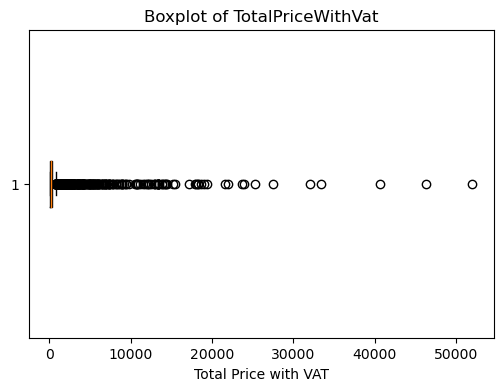

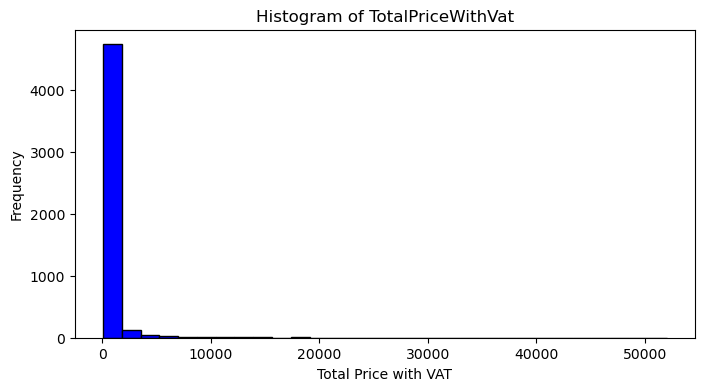

In [ ]:
# 'TotalPriceWithVat'
import matplotlib.pyplot as plt

# boxplot of 'TotalPriceWithVat'
plt.figure(figsize=(6, 4))
plt.boxplot(df['TotalPriceWithVat'], vert=False)
plt.title('Boxplot of TotalPriceWithVat')
plt.xlabel('Total Price with VAT')
plt.show()

# histogram of 'TotalPriceWithVat'
plt.figure(figsize=(8, 4))
plt.hist(df['TotalPriceWithVat'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of TotalPriceWithVat')
plt.xlabel('Total Price with VAT')
plt.ylabel('Frequency')
plt.show()

**Comments**: From the plots, we can clearly see that 'TotalPriceWithVat' is heavily skewed indicating presence of outliers. This can distort analysis of trends/insights so we must deal with it by filtering outliers out. 

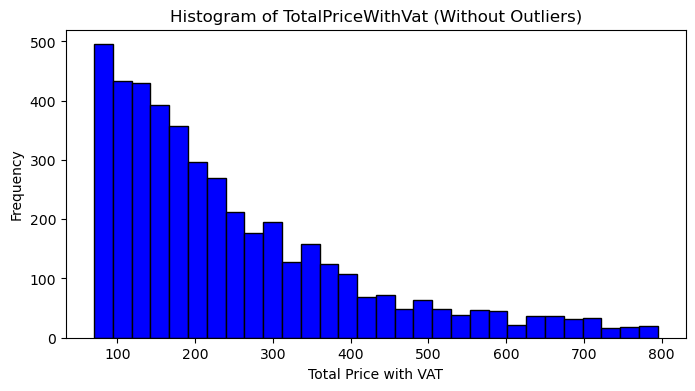

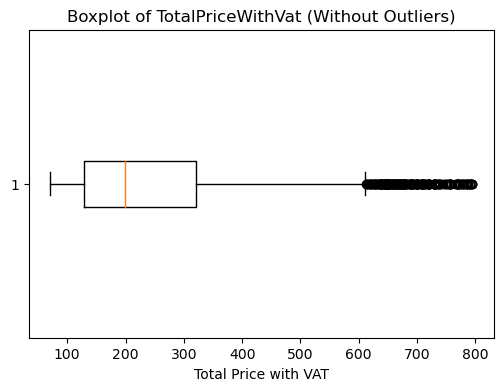

(4419, 6)

In [57]:
# Q1 25th percentile; Q3 75th percentile
Q1 = df['TotalPriceWithVat'].quantile(0.25)
Q3 = df['TotalPriceWithVat'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filtered dataset (excluding outliers)
filtered_df = df[(df['TotalPriceWithVat'] >= lower_bound) & (df['TotalPriceWithVat'] <= upper_bound)]

# histogram
plt.figure(figsize=(8, 4))
plt.hist(filtered_df['TotalPriceWithVat'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of TotalPriceWithVat (Without Outliers)')
plt.xlabel('Total Price with VAT')
plt.ylabel('Frequency')
plt.show()

# boxplot 
plt.figure(figsize=(6, 4))
plt.boxplot(filtered_df['TotalPriceWithVat'], vert=False)
plt.title('Boxplot of TotalPriceWithVat (Without Outliers)')
plt.xlabel('Total Price with VAT')
plt.show()

# resulting data: 
filtered_df.shape


**Comments**: Filtering out significant outliers allows for a much clear and insightful interpretation and potential for analysis. As seen in the plots, transaction values ('TotalPriceWithVat') are skewed with most of the values concentrted between 100-300. The retained data represents 88% of the original data (4419 out of 5000).

Text(0, 0.5, 'Total Revenue')

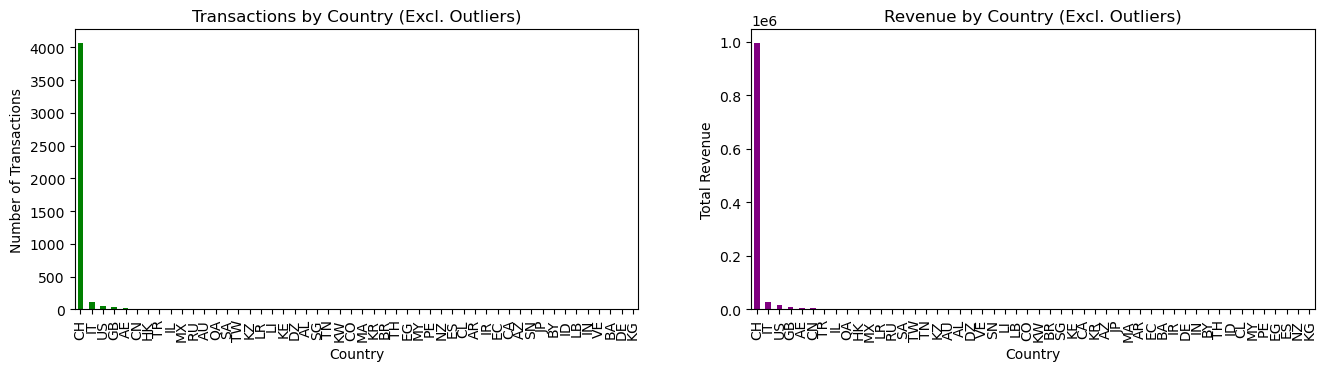

In [58]:
# 'CustomerResidencyCountryIso2Code' (evaluating Frequency of Transactions per country and Revenue per Coutnry)

# geographic distribution of transactions
country_distribution = filtered_df['CustomerResidencyCountryIso2Code'].value_counts()
revenue_by_country = filtered_df.groupby('CustomerResidencyCountryIso2Code')['TotalPriceWithVat'].sum()
revenue_by_country = revenue_by_country.sort_values(ascending=False)

# transactions by country
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 3)
country_distribution.plot(kind='bar', color='green')
plt.title('Transactions by Country (Excl. Outliers)')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')

# revenue by country
plt.subplot(2, 2, 4)
revenue_by_country.plot(kind='bar', color='purple')
plt.title('Revenue by Country (Excl. Outliers)')
plt.xlabel('Country')
plt.ylabel('Total Revenue')

Text(0, 0.5, 'Total Revenue')

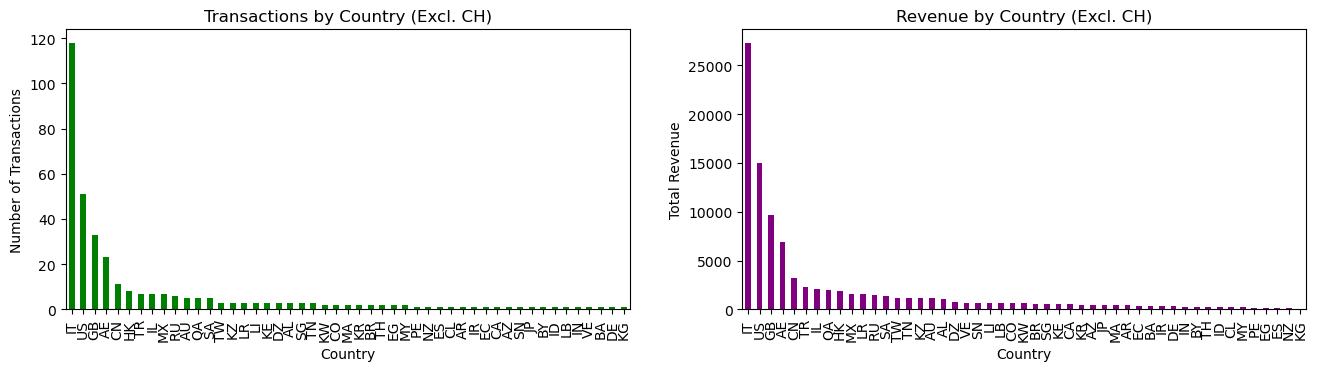

In [59]:
# exclude 'CH'
country_distribution_NoCH = country_distribution.drop('CH', errors='ignore')
revenue_by_country_NoCH = revenue_by_country.drop('CH', errors='ignore')

plt.figure(figsize=(16, 8))

# geographic distribution of transactions
plt.subplot(2, 2, 3)
country_distribution_NoCH.plot(kind='bar', color='green')
plt.title('Transactions by Country (Excl. CH)')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')

# revenue by country
plt.subplot(2, 2, 4)
revenue_by_country_NoCH.plot(kind='bar', color='purple')
plt.title('Revenue by Country (Excl. CH)')
plt.xlabel('Country')
plt.ylabel('Total Revenue')

**Comments**: As initially mentioned, Swiss customers represent an overwhelmingly dominant portion of the data (first two plots), and the revenue associated with Switzerland is incomparable to the rest of countries. 

**Decision**: Filter out non-Swiss data and focus on Swiss customers for analysis.

In [ ]:
# filtering out non-swiss customers for analysis:
swiss_df = filtered_df[filtered_df['CustomerResidencyCountryIso2Code'] == 'CH']
swiss_df.shape

(4071, 6)

### **Overall trends and distributions** (Based on 'swiss_df')

In [ ]:
# transaction trends over time (distribution of 'IssuedOn')
swiss_df['Date'] = swiss_df["IssuedOn"].dt.date
transactions_per_date_swiss = swiss_df['Date'].value_counts().sort_index()

# revenue trends over time
# swiss_df
daily_revenue_swiss = swiss_df.groupby('Date')['TotalPriceWithVat'].sum()

# merchant data
# swiss_df
transactions_per_merchant_swiss = swiss_df['MerchantId'].value_counts()
revenue_by_merchant_swiss = swiss_df.groupby('MerchantId')['TotalPriceWithVat'].sum()
revenue_by_merchant_swiss = revenue_by_merchant_swiss.sort_values(ascending=False)
# df
revenue_by_merchant_df = df.groupby('MerchantId')['TotalPriceWithVat'].sum()
revenue_by_merchant_df = revenue_by_merchant_df.sort_values(ascending=False)

/var/folders/qb/mz3tmb_j24b9025dmdsy3rgh0000gn/T/ipykernel_30583/1007466553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swiss_df['Date'] = swiss_df["IssuedOn"].dt.date


(array([20058., 20062., 20066., 20070., 20074., 20078., 20082., 20086.,
        20089.]),
 [Text(20058.0, 0, '2024-12-01'),
  Text(20062.0, 0, '2024-12-05'),
  Text(20066.0, 0, '2024-12-09'),
  Text(20070.0, 0, '2024-12-13'),
  Text(20074.0, 0, '2024-12-17'),
  Text(20078.0, 0, '2024-12-21'),
  Text(20082.0, 0, '2024-12-25'),
  Text(20086.0, 0, '2024-12-29'),
  Text(20089.0, 0, '2025-01-01')])

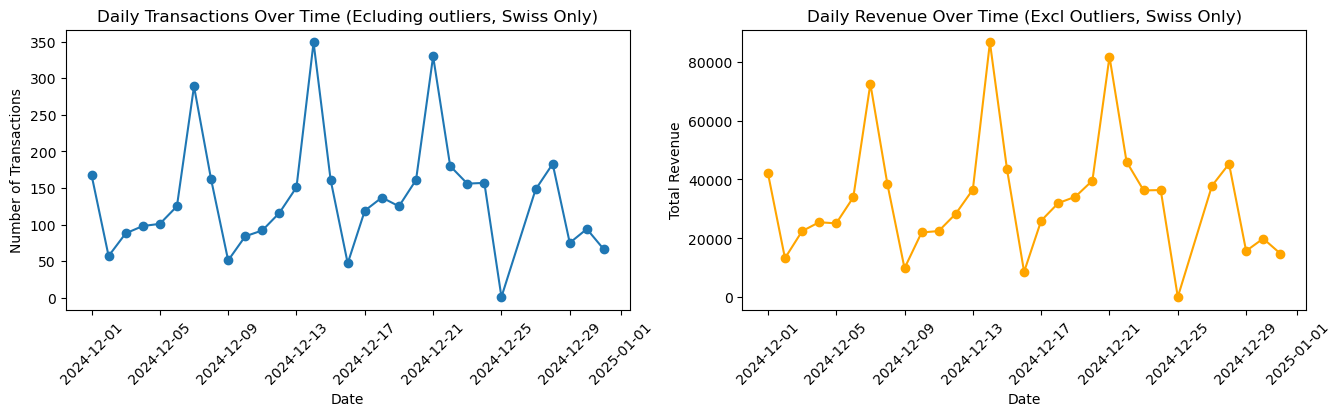

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# transactions over time (swiss_df)
plt.subplot(2, 2, 1)
plt.plot(transactions_per_date_swiss.index, transactions_per_date_swiss.values, marker='o')
plt.title('Daily Transactions Over Time (Ecluding outliers, Swiss Only)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# revenue over time
plt.subplot(2, 2, 2)
plt.plot(daily_revenue_swiss.index, daily_revenue_swiss.values, marker='o', color='orange')
plt.title('Daily Revenue Over Time (Excl Outliers, Swiss Only)')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

**Comments**: 
- Activity spikes on 5, 14 and 21 of December (likely indicating key dates related to pre-holiday shopping: christmas, new year)
- Similar trends between Transaction and Revenue daily behaviour: High volume of transactions typically relate to high revenue.
- Sharp drop in 2024-12-25 (Christmas): Shopping does not take place on the holiday itself.
- Seasonality: Both trends suggest some weekly seasonality and potential holiday-related behaviour. 

Text(0, 0.5, 'Total Revenue')

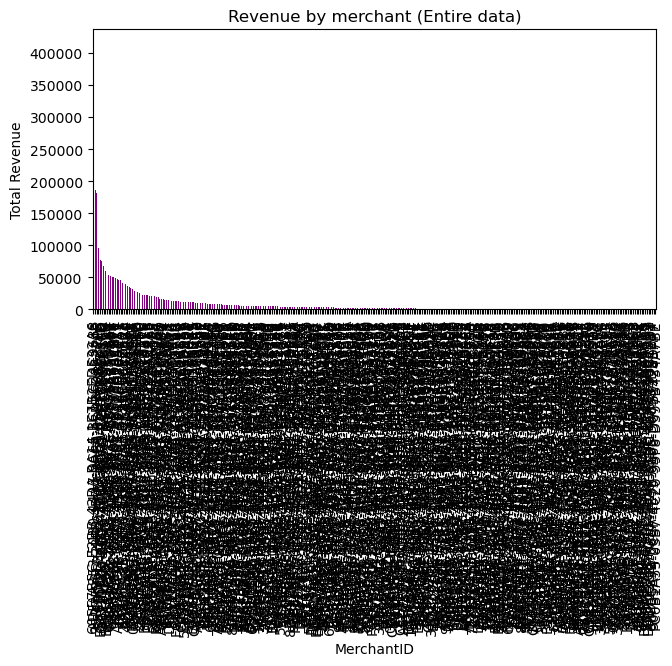

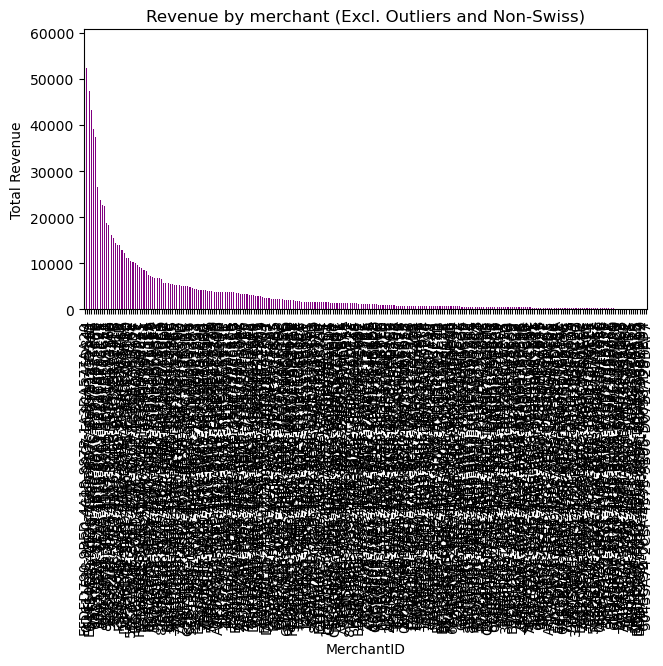

In [63]:
# revenue per merchant

# revenue by merchant (entire dataset)
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 4)
revenue_by_merchant_df.plot(kind='bar', color='purple')
plt.title('Revenue by merchant (Entire data)')
plt.xlabel('MerchantID')
plt.ylabel('Total Revenue')

# revenue by merchant (Excl. outliers and non-swiss)
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 4)
revenue_by_merchant_swiss.plot(kind='bar', color='purple')
plt.title('Revenue by merchant (Excl. Outliers and Non-Swiss)')
plt.xlabel('MerchantID')
plt.ylabel('Total Revenue')


**NOTE**: These two plots are NOT visually appeling; they were simply plotted to prove the point of filtering out outliers. Disproportionate revenue values associated to a single MerchantID (partner store).

### **Customer Behaviour Analysis**

#### **Segmentation and Insights**

In [ ]:
# repeat vs. one-time customers
repeat_customer_counts = swiss_df['CustomerId'].value_counts()
swiss_df['RepeatCustomer'] = swiss_df['CustomerId'].isin(repeat_customer_counts[repeat_customer_counts > 1].index)

# metrics
num_repeat_customers = repeat_customer_counts[repeat_customer_counts > 1].count()
percentage_repeat_customers = 100 * num_repeat_customers / repeat_customer_counts.count()
avg_transaction_size_repeat = swiss_df[swiss_df['RepeatCustomer']]['TotalPriceWithVat'].mean()
avg_transaction_size_one_time = swiss_df[~swiss_df['RepeatCustomer']]['TotalPriceWithVat'].mean()

print(f"Number of Repeat Customers: {num_repeat_customers}")
print(f"Percentage of Repeat Customers: {percentage_repeat_customers:.2f}%")
print(f"Average Transaction Size (Repeat): {avg_transaction_size_repeat:.2f}")
print(f"Average Transaction Size (One-Time): {avg_transaction_size_one_time:.2f}")

Number of Repeat Customers: 679
Percentage of Repeat Customers: 21.91%
Average Transaction Size (Repeat): 244.79
Average Transaction Size (One-Time): 245.09


/var/folders/qb/mz3tmb_j24b9025dmdsy3rgh0000gn/T/ipykernel_30583/1124256642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swiss_df['RepeatCustomer'] = swiss_df['CustomerId'].isin(repeat_customer_counts[repeat_customer_counts > 1].index)


**Comments**: 
- **21.91% are repeat customers**, this means that the majority of customers (78%) only purchase once with STAMP. This highlights the customer retention problem.
- Average transaction size is the **same** for one-tiume and repeat customers. Repeat customers don't necessarily spend more.

**Insights**: Need for retention strategies. Since transaction value is nearly identical between one-time/repeat customers, focus should be on **increasing transaction frequency** or **incentivizing larger purchases**


In [ ]:
# high-value vs. low-value customers
# aggregate total spending per customer
customer_spending = swiss_df.groupby('CustomerId')['TotalPriceWithVat'].sum()
quantile_threshold = customer_spending.quantile(0.8)
high_value_customers = customer_spending[customer_spending >= quantile_threshold].index

# mark high-value customers in the dataset
swiss_df['HighValueCustomer'] = swiss_df['CustomerId'].isin(high_value_customers)

total_revenue_high_value = customer_spending[customer_spending >= quantile_threshold].sum()
total_revenue_low_value = customer_spending[customer_spending < quantile_threshold].sum()

print(f"High-Value Customers contribute: {total_revenue_high_value / customer_spending.sum():.2f} of total revenue")

High-Value Customers contribute: 0.46 of total revenue


/var/folders/qb/mz3tmb_j24b9025dmdsy3rgh0000gn/T/ipykernel_30583/1264161161.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swiss_df['HighValueCustomer'] = swiss_df['CustomerId'].isin(high_value_customers)


**Comments**: High-value customers were defined as the those whose total spending is between the top 20% (80th percentile threshold).

**High-value customers** contribute **46%** of total revenue: critical group for STAMP; disproportionately important group -  
- **Retention strategies should prioritise this group**

In [ ]:
# cross-reference high-value with repeat customers

high_value_repeat = swiss_df[swiss_df['HighValueCustomer'] & swiss_df['RepeatCustomer']].drop_duplicates(subset='CustomerId').shape[0]
print(f"Number of High-Value Repeat Customers: {high_value_repeat}")
print("")
print(f"Number of Repeat Customers: {num_repeat_customers}")
print(f"Number of High-Value Customers: {len(high_value_customers)}")


Number of High-Value Repeat Customers: 361

Number of Repeat Customers: 679
Number of High-Value Customers: 620


**Comments**: 

**Critical target group: 361** customers are both **high-value and repeat customers** - intersection between two most important groups for retention/engagement strategies
* **53.17% of repeat customers** are also high value (361/679)
* **58.23% of high value customers** are also repeat (361/620)

**Missed Oportunites**: 
* large portion of **high value customers (41.77%) are one-time customer**s; need to retain/engage them
* **46.83% of repeat customers are not high value**; incentivize them to increase their spending.



#### **Transaction Patterns**

In [ ]:
# transaction Frequency
transactions_per_customer = swiss_df.groupby('CustomerId').size()
avg_transactions_per_customer = transactions_per_customer.mean()

# inter-transaction times for repeat customers
swiss_df = swiss_df.sort_values(['CustomerId', 'IssuedOn'])
swiss_df['TimeSinceLastTransaction'] = swiss_df.groupby('CustomerId')['IssuedOn'].diff().dt.days

avg_days_between_purchases = swiss_df['TimeSinceLastTransaction'].mean()
print(f"Average Number of Transactions Per Customer: {avg_transactions_per_customer:.2f}")
print(f"Average Days Between Purchases: {avg_days_between_purchases:.2f}")


Average Number of Transactions Per Customer: 1.31
Average Days Between Purchases: 5.77


**Comments**: 
- Low number of transactions per customer of 1.31 - Most customers make just one purchase w small number making repeated purchases.
- the average time between transactions for repeat customers is 5.77 (roughly a week): This can help in designing retention strategies like sending reminder notifications within a week after the purchase - **Optimal timing/window for retention strategies**-

#### **Engagement Insights**

In [ ]:
# churn indicators
one_time_users = swiss_df[~swiss_df['RepeatCustomer']]
one_time_users['IssuedDate'] = one_time_users['IssuedOn'].dt.date
one_time_inactive_dates = one_time_users['IssuedDate'].value_counts()   # Are there any special dates where one-time users are more likely to buy?
print("One-Time User Dates:")
print(one_time_inactive_dates.head())

One-Time User Dates:
2024-12-14    204
2024-12-21    197
2024-12-07    165
2024-12-01    112
2024-12-28    112
Name: IssuedDate, dtype: int64


/var/folders/qb/mz3tmb_j24b9025dmdsy3rgh0000gn/T/ipykernel_30583/470557973.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_time_users['IssuedDate'] = one_time_users['IssuedOn'].dt.date


In [ ]:
# repeat customer activity
repeat_users = swiss_df[swiss_df['RepeatCustomer']]
repeat_users['IssuedDate'] = repeat_users['IssuedOn'].dt.date
repeat_user_activity = repeat_users['IssuedDate'].value_counts()
print("Top Dates for Repeat Users:")
print(repeat_user_activity.head())


Top Dates for Repeat Users:
2024-12-14    145
2024-12-21    133
2024-12-07    124
2024-12-22     83
2024-12-28     71
Name: IssuedDate, dtype: int64


/var/folders/qb/mz3tmb_j24b9025dmdsy3rgh0000gn/T/ipykernel_30583/260461294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_users['IssuedDate'] = repeat_users['IssuedOn'].dt.date


**Comments**: 
- **Weekly seasonality** - Both one-time and repeat customers show **spikes in spending** during the same days: **December 14, 21, 7** (NOTE: the difference in transaction is due to the frequency imbalance between one-time/repeat customers). 
- To complement any derived actions/conclusions from this, let's first evaluate **day-of-the-week** and **hourly** patterns


Daily Revenue Patterns:
DayOfWeek
Saturday    285916.81
Sunday      185808.82
Friday      147980.07
Tuesday     121779.68
Monday       88060.46
Name: TotalPriceWithVat, dtype: float64

Hourly Revenue Patterns:
HourOfDay
10    158839.78
11    139455.49
14    135134.06
15    128524.71
16    105520.37
Name: TotalPriceWithVat, dtype: float64


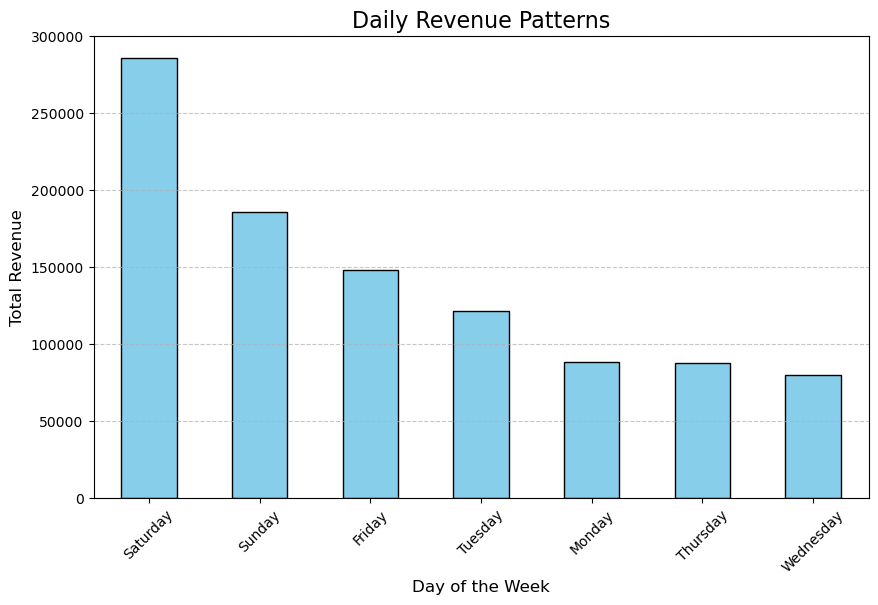

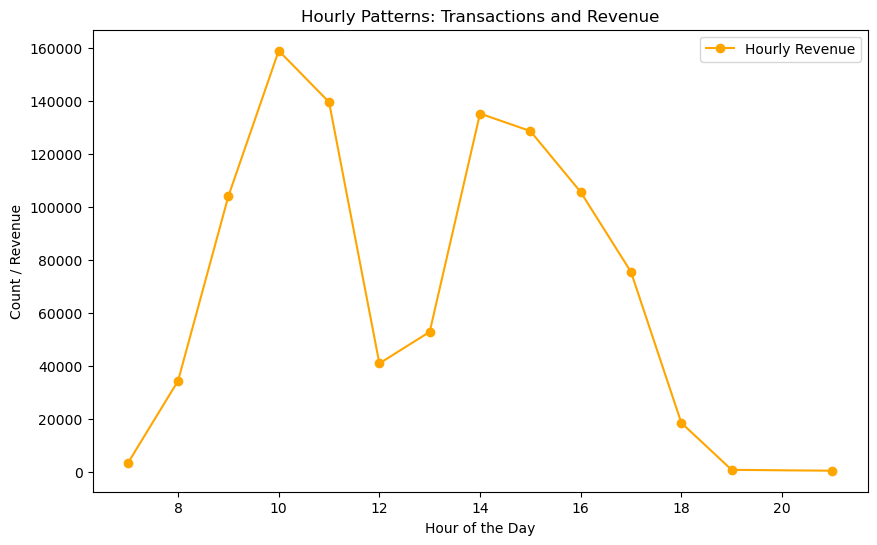

In [106]:
# daily revenue patterns
swiss_df['DayOfWeek'] = swiss_df['IssuedOn'].dt.day_name()
daily_revenue = swiss_df.groupby('DayOfWeek')['TotalPriceWithVat'].sum()

# hourly revenue patterns
swiss_df['HourOfDay'] = swiss_df['IssuedOn'].dt.hour
hourly_revenue = swiss_df.groupby('HourOfDay')['TotalPriceWithVat'].sum()


print("Daily Revenue Patterns:")
print(daily_revenue.sort_values(ascending=False).head())
print("")
print("Hourly Revenue Patterns:")
print(hourly_revenue.sort_values(ascending=False).head())


import matplotlib.pyplot as plt

# daily revenue patterns - bar chart
plt.figure(figsize=(10, 6))
daily_revenue.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Daily Revenue Patterns', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# hourly revenue patterns - bar chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_revenue.index, hourly_revenue.values, marker='o', label='Hourly Revenue', color='orange')
plt.title('Hourly Patterns: Transactions and Revenue')
plt.xlabel('Hour of the Day')
plt.ylabel('Count / Revenue')
plt.legend()
plt.show()


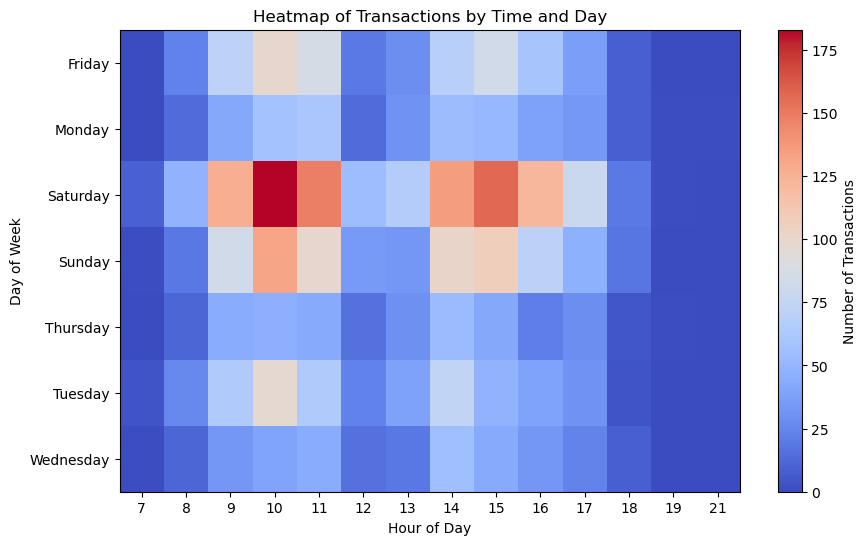

In [ ]:
# heatmap for time-of-day and day-of-week

heatmap_data = swiss_df.groupby(['DayOfWeek', 'HourOfDay']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
plt.imshow(heatmap_data, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Number of Transactions')
plt.title('Heatmap of Transactions by Time and Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.show()

**Comments** (Bar chart, line graph, heatmap):
- **Highest activity on weekend mornings**: 

    Clear **concentration of transactions during late morning and early afternoon on Saturdays and Sundays** (alignment with peaks seen in bar chart and line graph). The most active period occurs between **10:00 and 14:00 on Saturdays**

- Consistent patterns across days: weekday peaks beetween 10:000-14:00 are still visible, there is a **consistent late-morning early-afternoon pattern** despite of the weekday.


In [ ]:
# behavioral lifecycle
repeat_user_lifecycle = swiss_df[swiss_df['RepeatCustomer']].groupby('CustomerId').agg(
    first_purchase=('IssuedOn', 'min'),
    last_purchase=('IssuedOn', 'max'),
    purchase_count=('InvoiceId', 'count')
)
repeat_user_lifecycle['LifecycleDuration'] = (
    repeat_user_lifecycle['last_purchase'] - repeat_user_lifecycle['first_purchase']
).dt.days

print("Repeat User Lifecycle:")
print(repeat_user_lifecycle.head())


Repeat User Lifecycle:
                                              first_purchase  \
CustomerId                                                     
00688C5E-9531-4D22-96BF-9BA77B3BB17C 2024-12-14 16:24:24.224   
00A0B935-07A3-4E0B-B44D-1518D00058A1 2024-12-07 15:46:05.068   
010F0CDA-60D8-4A49-88C8-059F90F093F2 2024-12-01 09:27:29.773   
015E2D9D-42C1-4933-9DF1-B1973839FC46 2024-12-23 08:59:05.447   
01CE2B50-BA60-43B2-8156-31BD31193AEF 2024-12-15 11:30:34.001   

                                               last_purchase  purchase_count  \
CustomerId                                                                     
00688C5E-9531-4D22-96BF-9BA77B3BB17C 2024-12-21 13:59:06.239               2   
00A0B935-07A3-4E0B-B44D-1518D00058A1 2024-12-07 15:48:38.281               2   
010F0CDA-60D8-4A49-88C8-059F90F093F2 2024-12-15 09:33:03.969               2   
015E2D9D-42C1-4933-9DF1-B1973839FC46 2024-12-23 10:01:05.088               2   
01CE2B50-BA60-43B2-8156-31BD31193AEF 2024-12-15 

Lifecycle Duration Summary:
count    679.000000
mean       8.393225
std        7.534778
min        0.000000
25%        0.000000
50%        7.000000
75%       14.000000
max       30.000000
Name: LifecycleDuration, dtype: float64


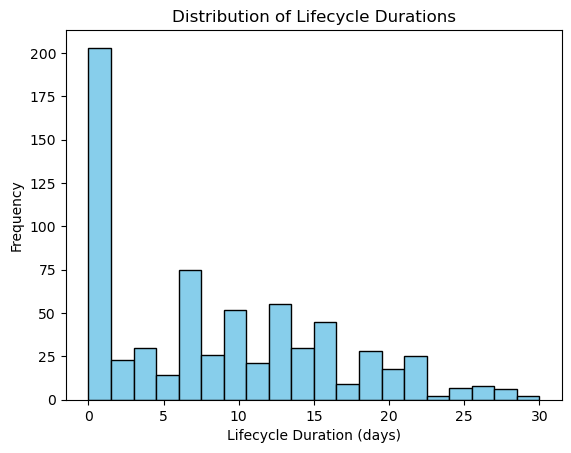

In [ ]:
# distribution of lifecycle duration
lifecycle_summary = repeat_user_lifecycle['LifecycleDuration'].describe()
print("Lifecycle Duration Summary:")
print(lifecycle_summary)

# histogram 
plt.hist(repeat_user_lifecycle['LifecycleDuration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Lifecycle Durations')
plt.xlabel('Lifecycle Duration (days)')
plt.ylabel('Frequency')
plt.show()

**Comments**: majority of customers have very short lifecycles, clustering around 0-7 days. The mean lifecycle duration is 8.39 and with a standard deviation of 7.53.
The concentrated purchasing behaviour within this short timeframe likely reflects seasonal behaviour (e.g. weekly)

Purchase Count Distribution:
2     493
3     120
4      41
5      14
6       9
7       1
10      1
Name: purchase_count, dtype: int64


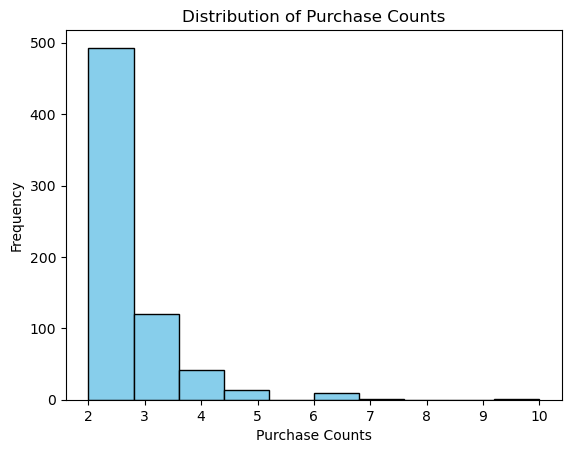

In [ ]:
# distribution of purchase counts
purchase_count_summary = repeat_user_lifecycle['purchase_count'].value_counts()
print("Purchase Count Distribution:")
print(purchase_count_summary)

# histogram 
plt.hist(repeat_user_lifecycle['purchase_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Purchase Counts')
plt.xlabel('Purchase Counts')
plt.ylabel('Frequency')
plt.show()

**Comments**: Most repeat customers (493/679) made only 2 pusrchases, with the frequency sharply dropping for higher counts. This highlights missed oportunity to increase retention and increase purchase count. 

Correlation between Lifecycle Duration and Purchase Count:
                   LifecycleDuration  purchase_count
LifecycleDuration           1.000000        0.333202
purchase_count              0.333202        1.000000


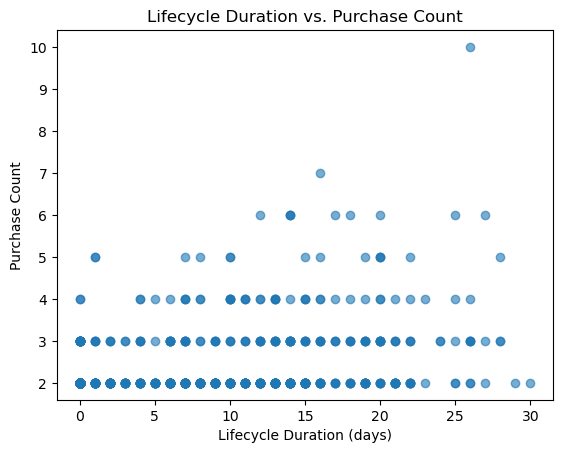

In [ ]:
# correlation between lifecycle duration and purchase count
correlation = repeat_user_lifecycle[['LifecycleDuration', 'purchase_count']].corr()
print("Correlation between Lifecycle Duration and Purchase Count:")
print(correlation)

# scatter plot lifecycle duration vs. purchase count
plt.scatter(repeat_user_lifecycle['LifecycleDuration'], repeat_user_lifecycle['purchase_count'], alpha=0.6)
plt.title('Lifecycle Duration vs. Purchase Count')
plt.xlabel('Lifecycle Duration (days)')
plt.ylabel('Purchase Count')
plt.show()

Average Purchase Count by Lifecycle Segment:
LifecycleSegment
0-5 days      2.171875
6-10 days     2.287770
11-20 days    2.634259
21-30 days    3.074627
Name: purchase_count, dtype: float64


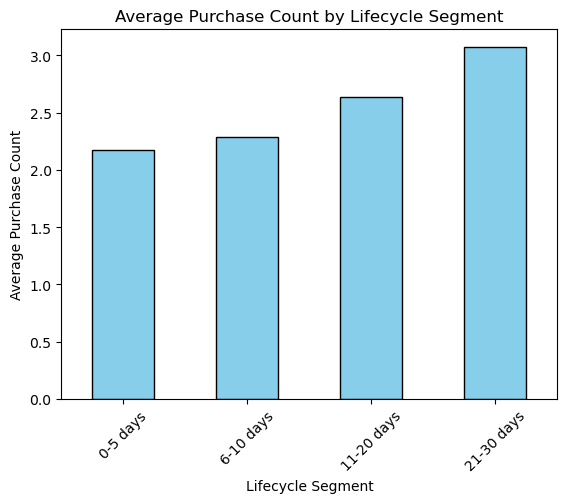

In [ ]:
# non-linear relationship: segmentation analysis

# clustering customers based on duration
bins = [0, 5, 10, 20, 30] 
labels = ['0-5 days', '6-10 days', '11-20 days', '21-30 days']
repeat_user_lifecycle['LifecycleSegment'] = pd.cut(repeat_user_lifecycle['LifecycleDuration'], bins=bins, labels=labels, right=False)

# average purchase count for each segment
segment_analysis = repeat_user_lifecycle.groupby('LifecycleSegment')['purchase_count'].mean()

print("Average Purchase Count by Lifecycle Segment:")
print(segment_analysis)

# bar chart
import matplotlib.pyplot as plt
segment_analysis.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Purchase Count by Lifecycle Segment')
plt.xlabel('Lifecycle Segment')
plt.ylabel('Average Purchase Count')
plt.xticks(rotation=45)
plt.show()


**Comments**:

The low correlation coefficient of 0.33 indicate that there is no strong direct linear relationship between lifecycle Duration and Purchase Count, it is not deterministic.

However, the segmentation analysis shows a trend where customers with longer duration times tend to make more purchases on average. Customers in the 21-30 day segment have an average purchase count of 3.07.

**Insight**: Engaged customers generate higher value over time. Increasing retention could increase the purchase count and revenue. 

### **Suggested Retention Strategy** *(Based on Derived Insights)*:

**Objective**: Increase recurrent purchases (repeat customers) and extend the purchase lifecycle duration of customer through specific incentives based on behavioural and temporal patterns.

Analysis-based incentives to include/consider:

* **Double Weekend Rewards**: Offer double loyalty points for purchases done during Saturdays and Sundays between 10:00 and 15:00 to take advantage of hottest spots. High-value customers (accummulated spending greater than 80th percentile threshold) will receive triple points to maximise their loyalty.

* ***"Welcome Back"* Discounts**: Send a personalised discount of 10-15% (to be determined with partner stores) to one-time customers that haven't purchased with STAMP for a period of 7 days since their first purchase, incentivising a second purchase. 

* **Loyalty Challenges**: Implement a system of rewards for weekly purchases for four consecutive weeks, such as special discounts and gifts to enhance frequency.


STAMP will reach its customers through a combination of:
- Email and SMS of weekly reminders of current rewards and personalised offers. 
- Push Notifications such as alerts during the most active periods (10:00-14:00) of weekends to incentivise immediate purchases.


It is important that the implementation of rewards, reminders and personalised offers prioritises one-time-high-value customers since this group has the highest comparative potential revenue growth. Historical data should be used to cluster STAMP's customers by the lyfecycle druration (days) and behavioural patterns, personalising offers according to customer characteristics. 

As monitoring and evaluation metrics, STAMP should focus on the following Key Performance Indicators (KPIs): 
- Increase Retention Rate: Aim for a **30% increase of the ratio of repeat-onetime customers**.
- Extend Customer Lyfecycle Duration: Increase the mean duration from **7 days to 14 days**.
- Revenue Increase: Achieve a **5% increase in additional revenues** coming from repeat customers in, for example, the first semester. 